In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

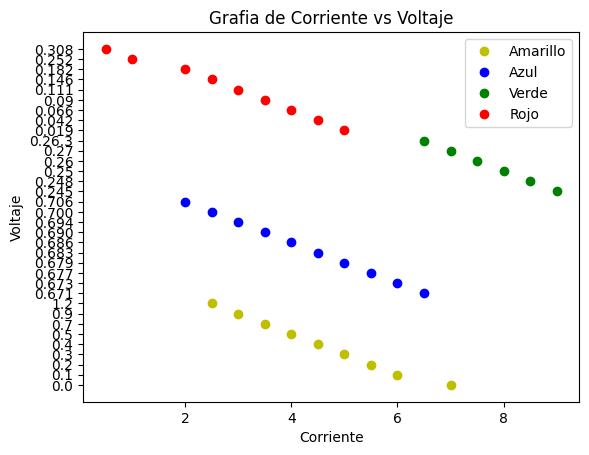

In [9]:
Datos = pd.read_csv('Datos_Exp1.csv')
Azul = Datos[Datos['Color'] == 'Azul']
Amarillo = Datos[Datos['Color'] == 'Amarillo']
Verde = Datos[Datos['Color'] == 'Verde']
Rojo = Datos[Datos['Color'] == 'Rojo']

plt.plot(Amarillo['Corriente'],Amarillo['Voltaje'],'yo')
plt.plot(Azul['Corriente'],Azul['Voltaje'],'bo')
plt.plot(Verde['Corriente'],Verde['Voltaje'],'go')
plt.plot(Rojo['Corriente'],Rojo['Voltaje'],'ro')
plt.legend(('Amarillo','Azul','Verde','Rojo'))
plt.title('Grafia de Corriente vs Voltaje')
plt.xlabel('Corriente')
plt.ylabel('Voltaje')
plt.show()

In [10]:
Amarillo

,Color,Corriente,Voltaje
0,Amarillo,7.0,0.0
1,Amarillo,6.0,0.1
2,Amarillo,5.5,0.2
3,Amarillo,5.0,0.3
4,Amarillo,4.5,0.4
5,Amarillo,4.0,0.5
6,Amarillo,3.5,0.7
7,Amarillo,3.0,0.9
8,Amarillo,2.5,1.2


In [11]:
Verde

,Color,Corriente,Voltaje
31,Verde,9.0,0.245
32,Verde,8.5,0.248
33,Verde,8.0,0.25
34,Verde,7.5,0.26
35,Verde,7.0,0.27
36,Verde,6.5,0.26.3


In [12]:
Rojo

,Color,Corriente,Voltaje
12,Rojo,5.0,0.019
13,Rojo,4.5,0.042
14,Rojo,4.0,0.066
15,Rojo,3.5,0.09
16,Rojo,3.0,0.111
17,Rojo,2.5,0.146
18,Rojo,2.0,0.182
19,Rojo,1.0,0.252
20,Rojo,0.5,0.308


In [13]:
Azul

,Color,Corriente,Voltaje
21,Azul,6.5,0.671
22,Azul,6.0,0.673
23,Azul,5.5,0.677
24,Azul,5.0,0.679
25,Azul,4.5,0.683
26,Azul,4.0,0.686
27,Azul,3.5,0.690
28,Azul,3.0,0.694
29,Azul,2.5,0.700
30,Azul,2.0,0.706


In [14]:
# División de los datos en train y test
# ==============================================================================
X = Azul[['Corriente']]
y = Azul['Voltaje']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [15]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [0.71878571]
Coeficiente: [('Corriente', -0.007714285714285692)]
Coeficiente de determinación R^2: 0.9787545094967426


/home/checho/.local/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[0.69564286]
 [0.67635714]]

El error (rmse) de test es: 0.0012474463711838518


In [17]:


# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())



TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:
X = Azul['Corriente'].to_numpy()
Y = Azul['Voltaje'].to_numpy()
np.polyfit(X,Y,deg=1,cov=True,full=False)